In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

def plot_md_window(rs, names, window_size, title, top=0.53, bottom=0.49, plot_type='min'):
    plt.figure()
    all_y = []
    for r in rs:
        y = [r[0]]
        if window_size == -1:
            for i in range(1, len(r)):
                if plot_type == 'median':
                    y.append(np.nanmedian(r[0:i]))
                elif plot_type == 'min':
                    y.append(np.nanmin(r[0:i]))
        else:
            for i in range(window_size, len(r)):
                if plot_type == 'median':
                    y.append(np.nanmedian(r[i-window_size:i]))
                elif plot_type == 'min':
                    y.append(np.nanmin(r[0:i]))
        all_y.append(y)
    k = 0 if window_size == -1 else window_size
    for y in all_y:
#       plt.plot(y[k:])
        data = {}
        data['y'] = y[k:]
        data['x'] = np.array(list(range(0, len(data['y']))))
        df = pd.DataFrame.from_dict(data)
        sns.lineplot(x="x", y="y", data=df)
    plt.xlim(left=k) 
    plt.ylim(top=top, bottom=bottom) 
    plt.xticks(np.arange(0, max([len(r) for r in rs]), step=int(xtick_len/30)))
    plt.legend(names, loc=[1, 0.65])
    plt.title(title)
    
def plot_md_window_multi(rs, names, window_size=0, title=[], top=0.53, bottom=0.49, plot_type='min'):
    plt.figure()
    all_y = []
    for r1 in rs:
        all_y1 = []
        for r in r1:
            y = [r[0]]
            if window_size == -1:
                for i in range(1, len(r)):
                    if plot_type == 'median':
                        y.append(np.nanmedian(r[0:i]))
                    elif plot_type == 'min':
                        y.append(np.nanmin(r[0:i]))
            else:
                for i in range(window_size, len(r)):
                    if plot_type == 'median':
                        y.append(np.nanmedian(r[i-window_size:i]))
                    elif plot_type == 'min':
                        y.append(np.nanmin(r[0:i]))
            all_y1.append(y)
        all_y.append(all_y1)
    k = 0 if window_size == -1 else window_size
    for y1 in all_y:
        data = {}
        data['y'], data['x'] = [], []
        for y in y1:
            data['y'] += y[k:1500]
            data['x'] += list(range(0, len(y[k:1500])))
        df = pd.DataFrame.from_dict(data)
        sns.lineplot(x="x", y="y", data=df) # , ci=None
    plt.xlim(left=k) 
    plt.ylim(top=top, bottom=bottom) 
    xtick_len = len(y)
    plt.xticks(np.arange(0, xtick_len+1, step=int(xtick_len/10)))
    plt.legend(names, loc=[1, 0.65])
    plt.title(title)

### Final Criteo

In [41]:
window_size = -1

# random
r_random_1 =np.load('../results/random/criteo/20200925-100520/rewards.npy') 
r_random = [r_random_1] # + [r_random_2] you can append more results here if you have repetitive experiments with different seeds

# AutoCTR (with 20 random search initial)
r_evo_1 = np.load('../results/evo/criteo/20200925-173209/rewards.npy')

r_evo = [r_evo_1] # + [r_evo_2] you can append more results here if you have repetitive experiments with different seeds


rs_c =  [r_random] + [r_evo]
names_c = ['Random'] + ['AutoCTR']

title_c = 'Random vs AutoCTR 7b Min Drift NO window Size' if window_size == -1 else 'Random vs AutoCTR 7b Min Drift (Window Size = ' + str(window_size) + ')'


In [42]:
min(r_random_1[:1000]), min(r_evo_1[:1000])

(0.49652692675590515, 0.4924725890159607)

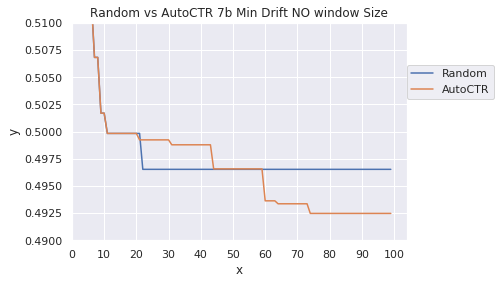

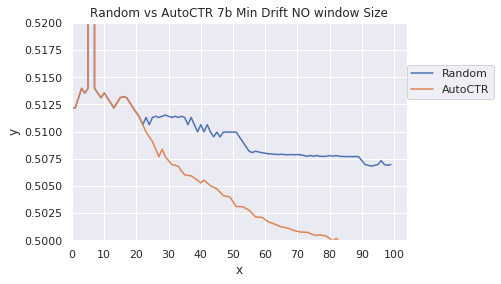

In [43]:
# window_size = -1

# # conclusion:

top = 0.51
bottom = 0.49
plot_md_window_multi(rs_c, names_c, window_size, title_c, top, bottom, 'min')

top = 0.52
bottom = 0.50
plot_md_window_multi(rs_c, names_c, window_size, title_c, top, bottom, 'median')